<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Unit 9 Project

This [dataset](https://catalog.data.gov/dataset/water-quality-data-41c5e) has multiple numerical columns, so I hope this would be easy to use.

### Background info on the dataset and setting up

The dataset is from the Department of the Interior, which shows how the water quality (place is unspecied) over a period of time by salinity, dissolved oxygen, ph, secchi depth, water depth, water temp, and air temp.

In [2]:
#importing the dataset
water = pd.read_csv("waterdataset.csv")

In [3]:
#dataset
water

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.000000,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.600000,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.600000,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.700000,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.000000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Bay,NaN,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,09:30,Sue Poe,11/13/2019,Christine Folks,25.555556,2018
2367,Bay,NaN,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,09:30,Sue Poe,11/13/2019,Christine Folks,14.444444,2018
2368,Bay,NaN,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,09:20,Sue Poe,11/13/2019,Christine Folks,9.444444,2018
2369,Bay,NaN,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,09:45,Sue Poe,11/13/2019,Christine Folks,18.333333,2018


In [4]:
#dropping columns that not numerical or useless
water = water.drop(columns=['Site_Id', 'Unit_Id', 'Read_Date','Time (24:00)', 'Field_Tech', 'DateVerified', 'WhoVerified', 'Air Temp-Celsius'])

In [5]:
#water

In [6]:
#Just there to look at the columns
#water.columns

In [7]:
#renaming columns
water = water.rename(columns={"Salinity (ppt)": "Salinity", "Dissolved Oxygen (mg/L)": "DissolvedOxygen", "pH (standard units)": "pH",  'Secchi Depth (m)': "SecchiDepth", 'Water Depth (m)': "WaterDepth", 'Water Temp (?C)': "WaterTempC", 'Air Temp (?F)': "AirTempF", 'AirTemp (C)': "AirTempC"})

In [8]:
#removes the row where there is no points of data
water = water.dropna()

In [9]:
water

,Salinity,DissolvedOxygen,pH,SecchiDepth,WaterDepth,WaterTempC,AirTempF,AirTempC,Year
0,1.3,11.7,7.3,0.40,0.40,5.9,46.40,8.000000,1994
1,1.5,12.0,7.4,0.20,0.35,3.0,36.68,2.600000,1994
2,1.0,10.5,7.2,0.25,0.60,5.9,45.68,7.600000,1994
3,1.0,10.1,7.4,0.35,0.50,10.0,36.86,2.700000,1994
4,1.0,12.6,7.2,0.20,0.40,1.6,32.00,0.000000,1994
...,...,...,...,...,...,...,...,...,...
2361,0.0,6.0,6.5,0.70,1.20,26.0,78.00,25.555556,2018
2364,0.0,6.9,6.5,0.90,1.30,20.0,65.00,18.333333,2018
2366,1.9,5.0,7.0,4.00,1.20,25.0,78.00,25.555556,2018
2367,0.0,9.0,7.0,0.30,0.60,18.0,58.00,14.444444,2018


### Water Temperature and Air Temperature

I am going to create a nonlinear multi-layer neural network to analyze water temperature and air temperature and find if there is a correlation.

<Axes: xlabel='AirTempC', ylabel='WaterTempC'>

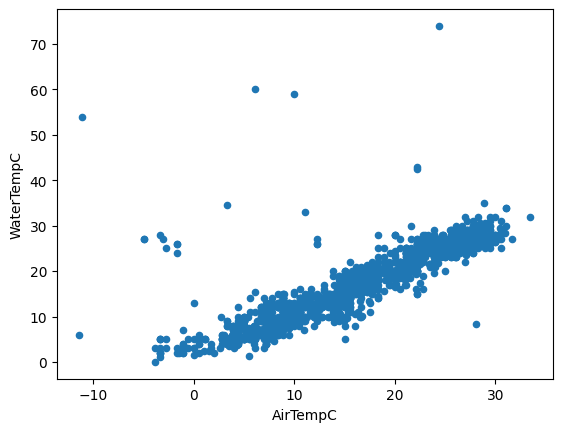

In [10]:
#scatter plot of the air temperature and the water temperature in celcius
water.plot(x="AirTempC", y="WaterTempC", kind="scatter")

I plotted WaterTempC and AirTempC to visualize and get a feeling how the data points look in a graph. This is also a way for me to keep up that AirTempC is on the x-axis and that WaterTempC is on the y-axis. Also, these temperatures are in Celsius accoridng to the orginal column names before I renamed them.

The next following pieces of code is the model. The model used is a multi-layer nonlinear neural network. This multi-layer neural network is a model that uses a form of matrix multiplication to make predictions on a data set.

In [11]:
#convert to a PyTorch tensor
w = water.WaterTempC.to_numpy()
wTemp = torch.from_numpy(w)
a = water.AirTempC.to_numpy()
aTemp = torch.from_numpy(a)

In [12]:
X = aTemp.unsqueeze(dim=1) #use air temperature in Celsius as a predictor
y = wTemp.unsqueeze(dim=1) #water temperature in Celsius is the estimand, the thing we're predicting.

In [13]:
# Scale the air temperature using standardization
scaler = StandardScaler()
aTemp_scaled = scaler.fit_transform(
    aTemp.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    aTemp_scaled, wTemp, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-13-300c7a05c49d>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-13-300c7a05c49d>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [14]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [15]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [16]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 376.23544, Test loss: 367.33423
Epoch: 200 | Train loss: 341.59332, Test loss: 333.50803
Epoch: 400 | Train loss: 246.60370, Test loss: 245.85789
Epoch: 600 | Train loss: 18.08335, Test loss: 117.87608
Epoch: 800 | Train loss: 17.97522, Test loss: 122.16595
Epoch: 1000 | Train loss: 17.89807, Test loss: 122.78978
Epoch: 1200 | Train loss: 17.93307, Test loss: 122.87970
Epoch: 1400 | Train loss: 17.92547, Test loss: 122.88742
Epoch: 1600 | Train loss: 17.89905, Test loss: 122.87209
Epoch: 1800 | Train loss: 17.90220, Test loss: 122.85407


In [17]:
# Turn on evaluation mode
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

<Figure size 1200x900 with 0 Axes>

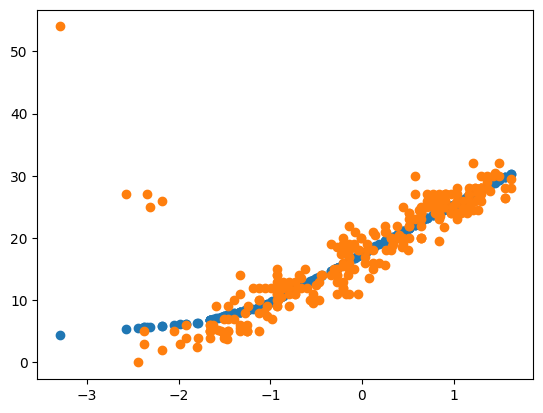

<Figure size 1200x900 with 0 Axes>

In [18]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())

#plots test data
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

plt.figure(figsize=(12, 9))

My thoughts on this model is that the model is working very well, but I think that the predictions of the left part of the graph may be off due to the outliers affecting the data.

Based on the model, the air temperature and the water temperature are almost proportional. So when the water air temperature lowers, the water temperature also lowers.

### Water Depth and Water Temperature

In this next model I will predicting if there is a correlation between water depth and water temperature. The model used is a nonlinear multilayer neural network.

I will plot how the data set looks like. I made it bigger to show clearly the clustered data.

<Axes: xlabel='WaterDepth', ylabel='WaterTempC'>

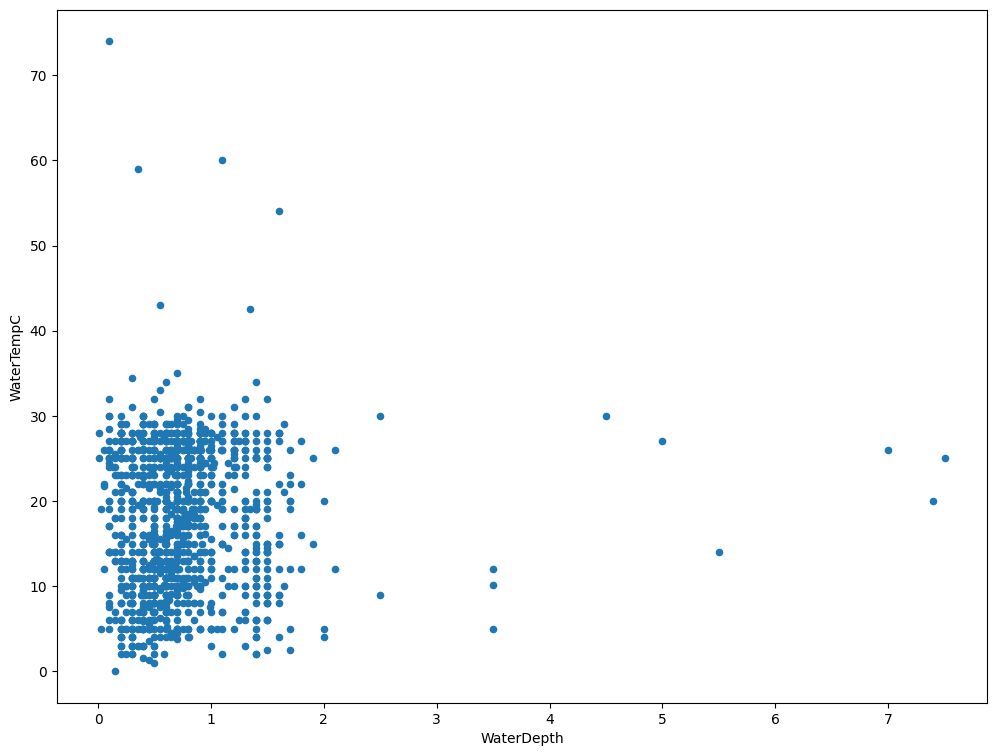

In [20]:
#scatter plot of the air temperature and the water temperature in celcius
water.plot(x="WaterDepth", y="WaterTempC", kind="scatter", figsize=(12, 9))

In [21]:
#convert to a PyTorch tensor
d = water.WaterDepth.to_numpy()
depth = torch.from_numpy(d)
w2 = water.WaterTempC.to_numpy()
wTemp2 = torch.from_numpy(w2)

In [22]:
X = depth.unsqueeze(dim=1) #use depth of water as a predictor
y = wTemp2.unsqueeze(dim=1) #water temperature in Celsius is the estimand, the thing we're predicting.

In [23]:
# Scale the air temperature using standardization
scaler = StandardScaler()
depth_scaled = scaler.fit_transform(
    depth.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    depth_scaled, wTemp2, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-23-6639a8cd545c>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-23-6639a8cd545c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [24]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [25]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [26]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 382.65570, Test loss: 376.38287
Epoch: 200 | Train loss: 352.71625, Test loss: 346.74643
Epoch: 400 | Train loss: 293.76944, Test loss: 287.98700
Epoch: 600 | Train loss: 70.04622, Test loss: 71.45127
Epoch: 800 | Train loss: 69.36256, Test loss: 70.66853
Epoch: 1000 | Train loss: 68.84151, Test loss: 70.28613
Epoch: 1200 | Train loss: 68.35036, Test loss: 70.09373
Epoch: 1400 | Train loss: 68.01929, Test loss: 70.01080
Epoch: 1600 | Train loss: 67.99767, Test loss: 69.99203
Epoch: 1800 | Train loss: 67.84413, Test loss: 70.00471


In [27]:
# Turn on evaluation mode
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

<Figure size 1200x900 with 0 Axes>

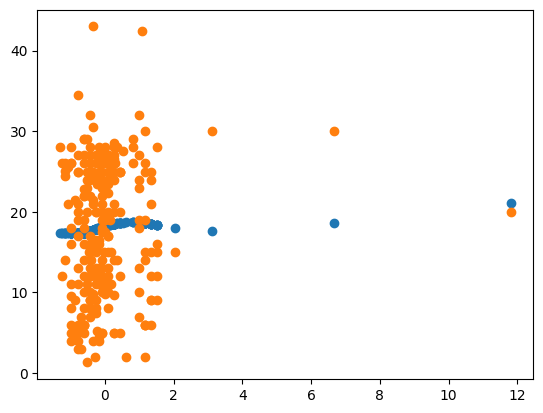

<Figure size 1200x900 with 0 Axes>

In [28]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())

#plots test data
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

plt.figure(figsize=(12, 9))

The model looks like it tried its best to include all datapoints in its predictions and in the end it looks wonky. Though it looks linear, it is not linear hence the small curve in the middle. i don't think the model is completely correct but it slightly captures the pattern shown in the data.

According to the predicted model, no matter the depth of the
water, the water temperature is in different ranges from very hot to very cold. I forgot to take account that the data was recorded through multiple years and during different times of the year, so the model is recording the average of the hottest temperature and the lowest temperature and creating the average temperature based on depth.